In [484]:
import numpy as np
import pandas as pd
from google.cloud import bigquery
from pandas import ExcelWriter

In [485]:
# %load_ext google.cloud.bigquery

In [486]:
# client = bigquery.Client()

In [487]:
# sql = """SELECT * from covid19_open_data.infectionrate_vs_population where location_key=country_code"""

In [488]:
# df = client.query(sql).to_dataframe()

In [531]:
df_1 = pd.read_excel('infectionrate_vs_population.xlsx')
df = df_1.drop(columns=['Unnamed: 0'])
df

,date,location_key,country_code,country_name,subregion1_code,subregion1_name,subregion2_code,subregion2_name,aggregation_level,new_confirmed,cumulative_confirmed,population,new_tested,cumulative_tested
0,2020-10-14,CM,CM,Cameroon,NaN,NaN,NaN,NaN,0,108.0,21441.0,25876380.0,NaN,NaN
1,2020-10-26,JO,JO,Jordan,NaN,NaN,NaN,NaN,0,1968.0,55055.0,10101694.0,NaN,NaN
2,2020-10-05,TH,TH,Thailand,NaN,NaN,NaN,NaN,0,10.0,3600.0,69625582.0,3697.0,1076332.0
3,2020-09-15,SK,SK,Slovakia,NaN,NaN,NaN,NaN,0,188.0,5768.0,5450421.0,4027.0,397513.0
4,2020-04-18,LK,LK,Sri Lanka,NaN,NaN,NaN,NaN,0,10.0,254.0,21803000.0,702.0,10494.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77059,2020-05-10,LU,LU,Luxembourg,NaN,NaN,NaN,NaN,0,9.0,3886.0,613894.0,1.0,3124.0
77060,2020-07-30,TD,TD,Chad,NaN,NaN,NaN,NaN,0,9.0,935.0,15946876.0,NaN,NaN
77061,2020-05-31,SL,SL,Sierra Leone,NaN,NaN,NaN,NaN,0,9.0,861.0,7813215.0,NaN,NaN
77062,2020-03-24,KE,KE,Kenya,NaN,NaN,NaN,NaN,0,9.0,25.0,52573973.0,NaN,NaN


In [490]:
# cur_dir = %pwd
# data_path = cur_dir + '/data'

In [491]:
# writer = ExcelWriter(data_path + "/" + "infectionrate_vs_population.xlsx")

In [492]:
# df.to_excel(writer, sheet_name='Sheet1')
# writer.save()

In [493]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77064 entries, 0 to 77063
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  77064 non-null  datetime64[ns]
 1   location_key          76752 non-null  object        
 2   country_code          76752 non-null  object        
 3   country_name          77064 non-null  object        
 4   subregion1_code       0 non-null      float64       
 5   subregion1_name       0 non-null      float64       
 6   subregion2_code       0 non-null      float64       
 7   subregion2_name       0 non-null      float64       
 8   aggregation_level     77064 non-null  int64         
 9   new_confirmed         72059 non-null  float64       
 10  cumulative_confirmed  72061 non-null  float64       
 11  population            76440 non-null  float64       
 12  new_tested            21569 non-null  float64       
 13  cumulative_teste

In [494]:
df_sml = df.drop(columns=['subregion1_code', 'subregion2_code', 'subregion2_name','subregion1_name'])

In [495]:
df_sml.shape

(77064, 10)

In [496]:
kys = df_sml['location_key'].unique()
vals = df_sml['country_name'].unique()
# print(kys,vals,type(kys),type(vals))

countries = dict(zip(kys, vals))

In [497]:
# df_sml['population'].isnull()
# Counties with population is not available
check = df_sml[df_sml['population'].isna()]
print("Total number of counties: ",df_sml['country_name'].nunique())
print("Countries for which population data is not available: ",check['country_name'].unique())


Total number of counties:  247
Countries for which population data is not available:  ['Namibia' 'Svalbard and Jan Mayen']


new_confirmed column has to be numerical and also zero is possible. Hence replacing nan with zero.

2 counties has nan values in population. Hence dropping. Could not be found in external source. Namibia, Svalbard and Jan Mayen

In [498]:
df_sml_nn = df_sml

In [499]:
df_sml_nn[['new_confirmed']] = df_sml_nn['new_confirmed'].fillna(0)
# filling na values in new_tested with zero
df_sml_nn['new_tested'] = df_sml_nn['new_tested'].fillna(0)
df_sml_nn['cumulative_tested'] = df_sml_nn['cumulative_tested'].fillna(0)
df_sml_nn= df_sml_nn[df_sml_nn['population'].notna()]
df_sml_nn = df_sml_nn.astype({"population":int, "new_tested":int, "cumulative_tested":int})
df_sml_nn.head()

,date,location_key,country_code,country_name,aggregation_level,new_confirmed,cumulative_confirmed,population,new_tested,cumulative_tested
0,2020-10-14,CM,CM,Cameroon,0,108.0,21441.0,25876380,0,0
1,2020-10-26,JO,JO,Jordan,0,1968.0,55055.0,10101694,0,0
2,2020-10-05,TH,TH,Thailand,0,10.0,3600.0,69625582,3697,1076332
3,2020-09-15,SK,SK,Slovakia,0,188.0,5768.0,5450421,4027,397513
4,2020-04-18,LK,LK,Sri Lanka,0,10.0,254.0,21803000,702,10494


In [500]:
df_sml_nn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76440 entries, 0 to 77063
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  76440 non-null  datetime64[ns]
 1   location_key          76440 non-null  object        
 2   country_code          76440 non-null  object        
 3   country_name          76440 non-null  object        
 4   aggregation_level     76440 non-null  int64         
 5   new_confirmed         76440 non-null  float64       
 6   cumulative_confirmed  71751 non-null  float64       
 7   population            76440 non-null  int64         
 8   new_tested            76440 non-null  int64         
 9   cumulative_tested     76440 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 6.4+ MB


In [501]:
df_pivot = df.pivot(index='date', columns=["location_key"],values='new_confirmed')

In [502]:
df_pivot = df_pivot[:-2]

In [503]:
df_pivot.shape
all_nan_countries = []
all_loc_keys = df_pivot.columns
for key in all_loc_keys:
    if df_pivot[key].isna().sum() == df_pivot.shape[0]:
        all_nan_countries.append(key)
print(f"countries having all NaN values in new_confirmed column: {all_nan_countries}")

countries having all NaN values in new_confirmed column: ['AN', 'AQ', 'BV', 'CC', 'CX', 'GS', 'GZ', 'HM', 'IO', 'NF', 'SJ', 'TF', 'UM']


all new_confirmed values in 'AN', 'AQ', 'BV', 'CC', 'CX', 'GS', 'GZ', 'HM', 'IO', 'NF', 'SJ', 'TF', 'UM' are NaN. Hence dropping these columns

In [504]:
all_loc_keys = df_pivot.columns
len_keys = len(all_loc_keys)
df_clean = df_pivot
for key in all_loc_keys:
    if df_clean[key].isna().sum() == df_clean.shape[0]:
        df_clean = df_clean.drop(columns=key)

In [505]:
df_cleaned = df_clean.fillna(0)

In [506]:
df_pivot_tested = df.pivot(index='date', columns=["location_key"],values='new_tested')

In [507]:
df_pivot_tested.shape
all_nan_countries_tested = []
all_loc_keys = df_pivot_tested.columns
for key in all_loc_keys:
    if df_pivot_tested[key].isna().sum() == df_pivot_tested.shape[0]:
        all_nan_countries_tested.append(key)
print(f"countries having all NaN values in new_tested column: {all_nan_countries_tested} count:{len(all_nan_countries_tested)}")

countries having all NaN values in new_tested column: ['AD', 'AF', 'AG', 'AI', 'AL', 'AM', 'AN', 'AO', 'AQ', 'AS', 'AW', 'AZ', 'BA', 'BB', 'BF', 'BI', 'BJ', 'BM', 'BN', 'BQ', 'BR', 'BS', 'BT', 'BV', 'BW', 'BZ', 'CC', 'CF', 'CG', 'CK', 'CM', 'CN', 'CV', 'CW', 'CX', 'DE', 'DJ', 'DM', 'DZ', 'EG', 'EH', 'ER', 'ES', 'FK', 'FM', 'FO', 'GA', 'GD', 'GE', 'GF', 'GG', 'GI', 'GL', 'GM', 'GN', 'GQ', 'GS', 'GU', 'GW', 'GY', 'GZ', 'HK', 'HM', 'HN', 'HT', 'IM', 'IO', 'JE', 'KG', 'KH', 'KI', 'KM', 'KN', 'KP', 'KY', 'LA', 'LB', 'LC', 'LR', 'LS', 'MC', 'MD', 'ME', 'MH', 'ML', 'MN', 'MO', 'MP', 'MQ', 'MS', 'MU', 'NC', 'NE', 'NF', 'NI', 'NL', 'NR', 'NU', 'PF', 'PG', 'PN', 'PR', 'PW', 'RE', 'SB', 'SC', 'SD', 'SG', 'SH', 'SJ', 'SL', 'SM', 'SO', 'SR', 'SS', 'ST', 'SX', 'SY', 'SZ', 'TC', 'TD', 'TF', 'TJ', 'TK', 'TL', 'TM', 'TO', 'TT', 'TV', 'TZ', 'UM', 'UZ', 'VA', 'VC', 'VE', 'VG', 'VI', 'VU', 'WF', 'WS', 'XK', 'YE', 'YT'] count:143


countries having all NaN values in new_confirmed column: ['AD', 'AF', 'AG', 'AI', 'AL', 'AM', 'AN', 'AO', 'AQ', 'AS', 'AW', 'AZ', 'BA', 'BB', 'BF', 'BI', 'BJ', 'BM', 'BN', 'BQ', 'BR', 'BS', 'BT', 'BV', 'BW', 'BZ', 'CC', 'CF', 'CG', 'CK', 'CM', 'CN', 'CV', 'CW', 'CX', 'DE', 'DJ', 'DM', 'DZ', 'EG', 'EH', 'ER', 'ES', 'FK', 'FM', 'FO', 'GA', 'GD', 'GE', 'GF', 'GG', 'GI', 'GL', 'GM', 'GN', 'GQ', 'GS', 'GU', 'GW', 'GY', 'GZ', 'HK', 'HM', 'HN', 'HT', 'IM', 'IO', 'JE', 'KG', 'KH', 'KI', 'KM', 'KN', 'KP', 'KY', 'LA', 'LB', 'LC', 'LR', 'LS', 'MC', 'MD', 'ME', 'MH', 'ML', 'MN', 'MO', 'MP', 'MQ', 'MS', 'MU', 'NC', 'NE', 'NF', 'NI', 'NL', 'NR', 'NU', 'PF', 'PG', 'PN', 'PR', 'PW', 'RE', 'SB', 'SC', 'SD', 'SG', 'SH', 'SJ', 'SL', 'SM', 'SO', 'SR', 'SS', 'ST', 'SX', 'SY', 'SZ', 'TC', 'TD', 'TF', 'TJ', 'TK', 'TL', 'TM', 'TO', 'TT', 'TV', 'TZ', 'UM', 'UZ', 'VA', 'VC', 'VE', 'VG', 'VI', 'VU', 'WF', 'WS', 'XK', 'YE', 'YT'] count:143

In [508]:
all_loc_keys_tested = df_pivot_tested.columns
len_keys = len(all_loc_keys_tested)
df_clean_tested = df_pivot_tested
for key in all_loc_keys_tested:
    if df_clean_tested[key].isna().sum() == df_clean_tested.shape[0]:
        df_clean_tested = df_clean_tested.drop(columns=key)
df_cleaned_tested = df_clean_tested.fillna(0)
# df_cleaned_tested

In [509]:
# Calculating Infection rates for all location keys
infection_rate = df_cleaned.sum(axis = 0) / df_cleaned.shape[0]
infection_rate = infection_rate.to_frame(name = "infection rate")

infection_rate_test = pd.DataFrame()
infection_rate_test = infection_rate

infection_rate_test['location_key'] = infection_rate.index
infection_rate_test.reset_index(drop=True, inplace=True)

# infection_rate_test

In [510]:
# Infection_rate vs Population. preparation for ploting

merged_inner = pd.merge(left=infection_rate_test, right=df_pop, left_on='location_key', right_on='key')

new_final = merged_inner[['infection rate','location_key','population']]

new_final['country'] = new_final['location_key'].map(countries) 

new_final = new_final.astype({"population":int}) 

zoomed = new_final.loc[(new_final['population']<400000000) & (new_final['infection rate']<10000)]
zoomed = zoomed.sort_values("infection rate", ascending=False)

new_final = new_final.rename(columns={"infection rate": "infection_rate"})
new_final['infection_rate'] = round(new_final['infection_rate'], 2)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [511]:
new_final

,infection_rate,location_key,population,country
0,42.10,NaN,2494530,Namibia
1,16.57,AD,77142,Andorra
2,447.24,AE,9770529,United Arab Emirates
3,135.45,AF,38041754,Afghanistan
4,0.44,AG,97118,Antigua and Barbuda
...,...,...,...,...
229,6.67,YE,29161922,Yemen
230,14.68,YT,256518,Mayotte
231,2362.68,ZA,58558270,South Africa
232,54.12,ZM,17861030,Zambia


In [512]:
from datalab.context import Context
new_final.to_gbq('covid19_open_data.infection_rate', 
                           'seraphic-being-294617',
#                  Context.default().project_id,
                         chunksize=10000, 
                         if_exists='replace'
                         )

1it [00:05,  5.54s/it]


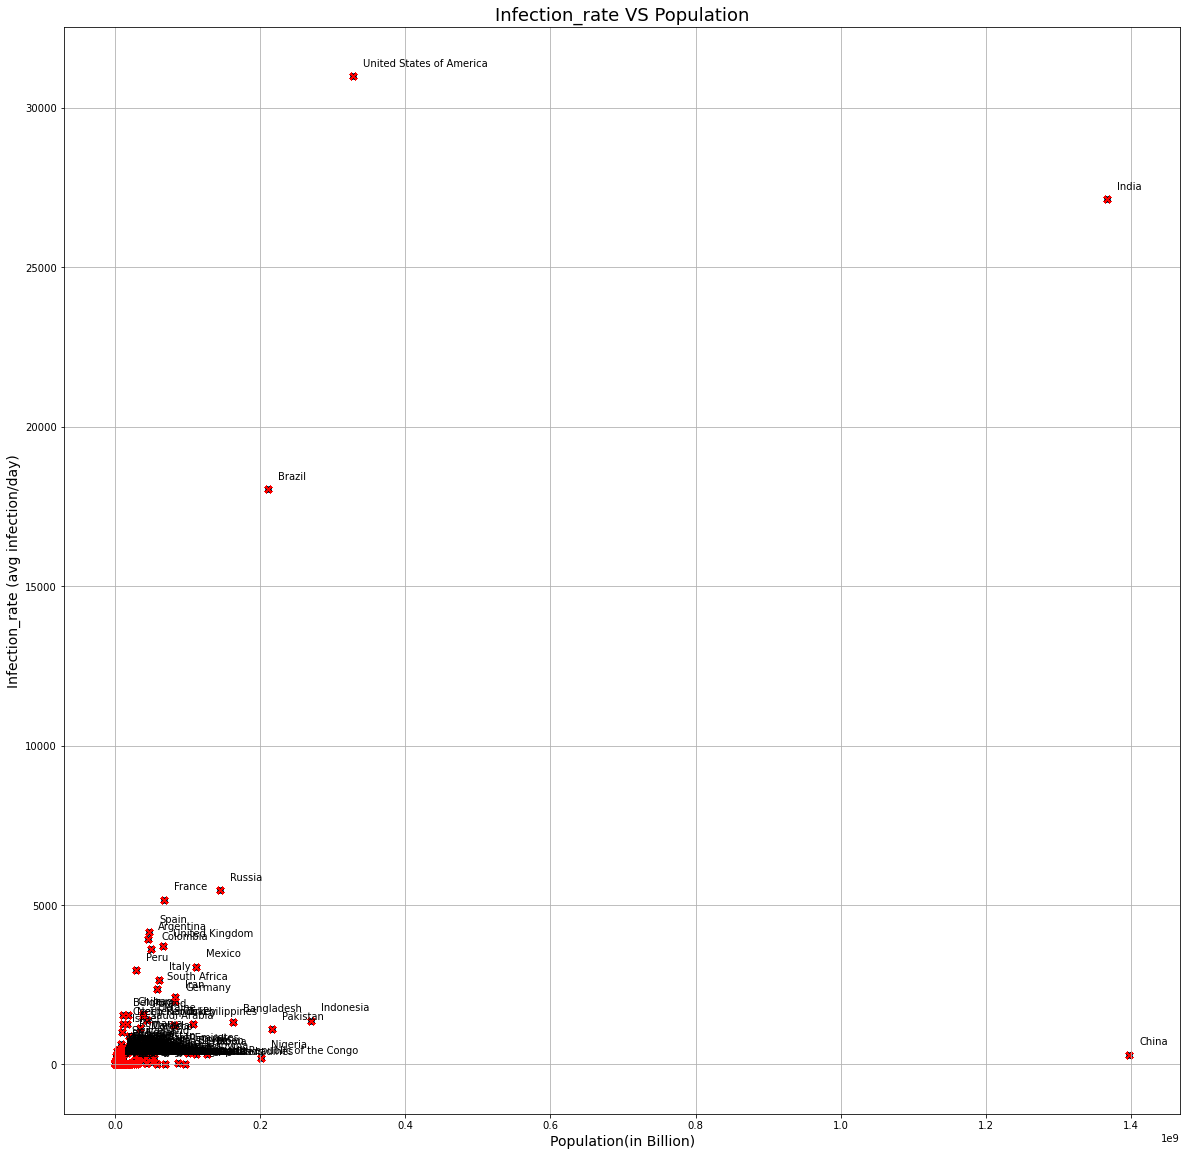

In [513]:
import matplotlib.pyplot as plt

# x = np.log(new_final['population'])
# y = np.log(new_final['infection rate'])
x = new_final['population']
y = new_final['infection_rate']
lab = new_final['country']

fig, ax = plt.subplots(figsize=(20,20))
ax.scatter(x, y)

# ax = plt.subplot(212)
ax.set_xlabel('Population(in Billion)', fontsize=14)
ax.set_ylabel('Infection_rate (avg infection/day)', fontsize=14)
ax.set_title('Infection_rate VS Population', fontsize=18)


for i, txt in enumerate(lab):
    ax.annotate(txt, (x[i], y[i]), xytext=(10,10), textcoords='offset points')
    plt.scatter(x, y, marker='x', color='red')

plt.grid()
plt.show()
# plt.figsize(20,20)
# new_final.plot.scatter(x='population', y='infection rate', label='country', figsize=(16, 16));

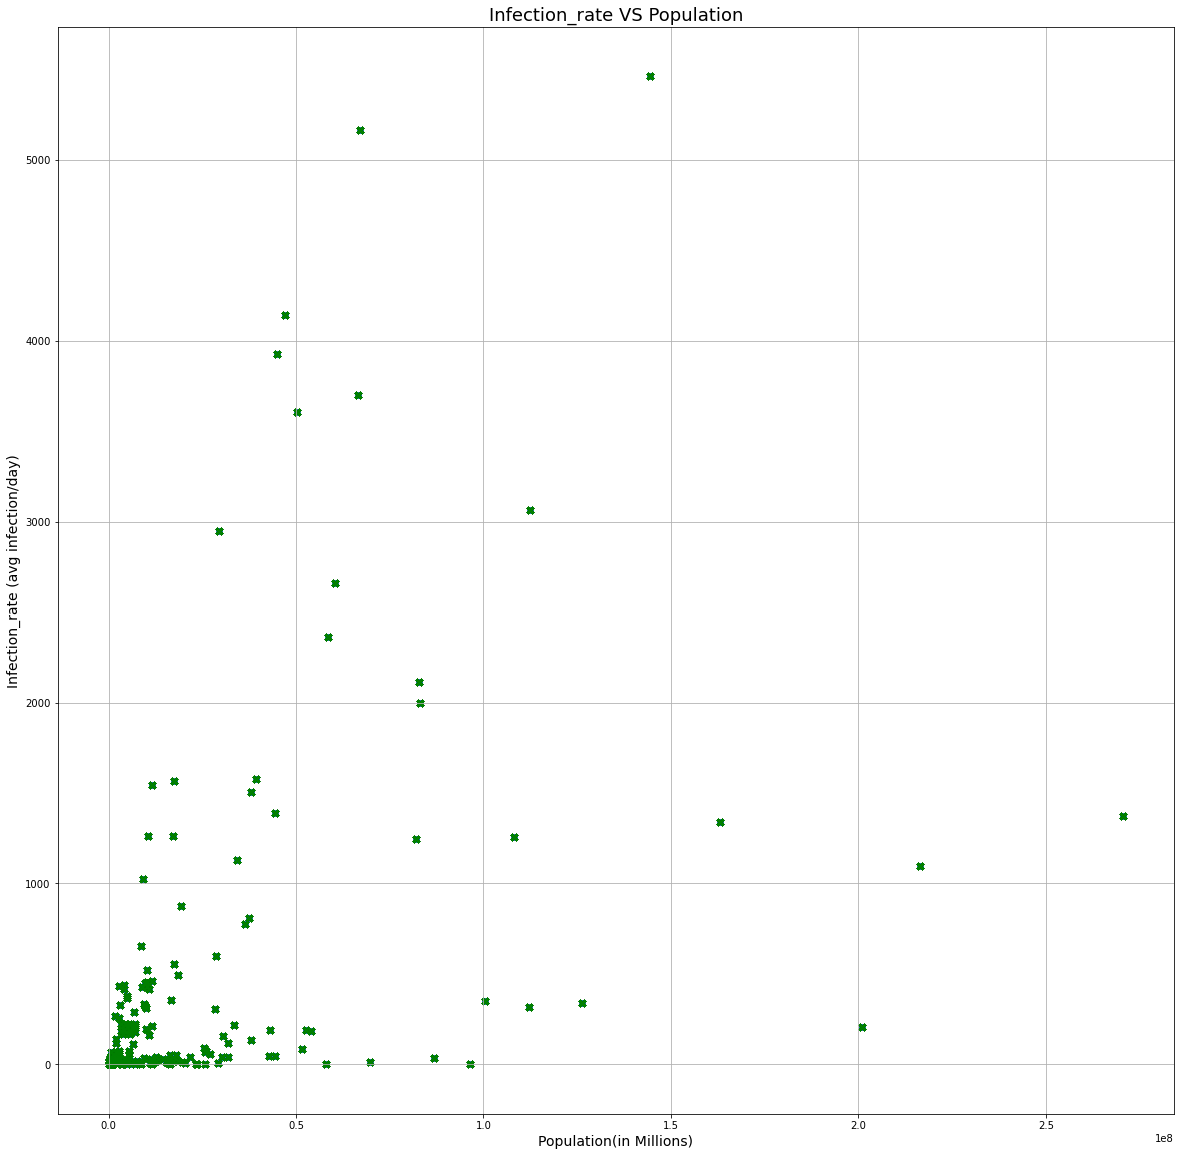

In [514]:
import matplotlib.pyplot as plt
x1 = zoomed['population']
y1 = zoomed['infection rate']
lab1 = zoomed['country']

fig1, ax1 = plt.subplots(figsize=(20,20))
ax1.scatter(x1, y1)

# ax1 = plt.subplot(212)
ax1.set_xlabel('Population(in Millions)', fontsize=14)
ax1.set_ylabel('Infection_rate (avg infection/day)', fontsize=14)
ax1.set_title('Infection_rate VS Population', fontsize=18)


for i, txt1 in enumerate(lab1):
#     print(txt1)
    ax.annotate(txt1, (x[i], y[i]), xytext=(10,10),textcoords='offset points')
    plt.scatter(x1, y1, marker='x', color='green')

plt.grid()
plt.show()

In [515]:
# Calculating total testing for all location keys
total_testing = df_cleaned_tested.sum(axis = 0)
total_testing = total_testing.to_frame(name = "Total_testings")

total_testing_test = pd.DataFrame()
total_testing_test = total_testing

total_testing_test['location_key'] = total_testing_test.index
total_testing_test.reset_index(drop=True, inplace=True)

# total_testing_test

In [516]:
df_pivot_tested_cumu = df.pivot(index='date', columns=["location_key"],values='cumulative_tested')

all_loc_keys_tested_cumu = df_pivot_tested_cumu.columns
len_keys_cumu = len(all_loc_keys_tested_cumu)
df_clean_tested_cumu = df_pivot_tested_cumu
for key in all_loc_keys_tested_cumu:
    if df_clean_tested_cumu[key].isna().sum() == df_clean_tested_cumu.shape[0]:
        df_clean_tested_cumu = df_clean_tested_cumu.drop(columns=key)
df_cleaned_tested_cumu = df_clean_tested_cumu.fillna(0)
# df_cleaned_tested_cumu

In [517]:
loc_list = df_cleaned_tested_cumu.columns
max_list=[]
for items in loc_list:
    max_list.append(max(df_cleaned_tested_cumu[items]))
loc_cumu_max = dict(zip(loc_list, max_list))
for keys in loc_cumu_max:
    loc_cumu_max[keys] = int(loc_cumu_max[keys])
loc_cumu_max['AE']

14137717

In [518]:
print(loc_cumu_max)

{nan: 131715, 'AE': 14137717, 'AR': 2512406, 'AT': 2452692, 'AU': 9097814, 'BD': 2429010, 'BE': 5281944, 'BG': 793277, 'BH': 1823595, 'BO': 335456, 'BR': 6421441, 'BY': 2573132, 'CA': 9884582, 'CH': 2157721, 'CI': 197091, 'CL': 0, 'CN': 160000000, 'CO': 4240181, 'CR': 242306, 'CU': 909632, 'CY': 503927, 'CZ': 2584114, 'DE': 23393311, 'DK': 5569081, 'DO': 616366, 'EC': 512577, 'EE': 280693, 'ET': 1526221, 'FI': 1619634, 'FJ': 13535, 'FR': 17891276, 'GB': 35600586, 'GH': 543316, 'GR': 1941656, 'GT': 451070, 'HK': 3753969, 'HR': 559016, 'HU': 1209151, 'ID': 3080718, 'IE': 1715684, 'IL': 4918243, 'IN': 117736791, 'IQ': 2970814, 'IR': 5224252, 'IS': 194748, 'IT': 17183569, 'JM': 99548, 'JO': 2003989, 'JP': 3239618, 'KE': 730363, 'KR': 2677232, 'KW': 955447, 'KZ': 3754917, 'LI': 900, 'LK': 590435, 'LT': 1080306, 'LU': 1131669, 'LV': 497949, 'MA': 3451451, 'MG': 87659, 'MK': 271599, 'MM': 317765, 'MR': 88310, 'MT': 251746, 'MV': 208105, 'MW': 65901, 'MX': 2116581, 'MY': 2238559, 'MZ': 196793,

In [519]:
merged_inner_tested.head()

,Total_testings,location_key,infection_rate,population,country
0,14137717.0,AE,447.24,9770529,United Arab Emirates
1,2512406.0,AR,3925.87,44938712,Argentina
2,2452692.0,AT,426.71,8858775,Austria
3,9097814.0,AU,89.14,25364307,Australia
4,2429010.0,BD,1341.98,163046161,Bangladesh


In [520]:
# Infection_rate vs rating. preparation for ploting
# merged_inner_tested = merged_inner_tested.astype({"Total_testings":int}) 
merged_inner_tested = pd.merge(left=total_testing_test, right=new_final, left_on='location_key', right_on='location_key',how="outer")
# merged_inner_tested['Total_testings'] = 

for ind, loc in enumerate(merged_inner_tested.location_key):
    try:
        merged_inner_tested['Total_testings'][ind] = max(merged_inner_tested['Total_testings'][ind], loc_cumu_max[loc])
    except KeyError:
        continue
# new_final = merged_inner[['infection rate','location_key','population']]

# new_final['country'] = new_final['location_key'].map(countries) 



# zoomed = new_final.loc[(new_final['population']<400000000) & (new_final['infection rate']<10000)]
# zoomed = zoomed.sort_values("infection rate", ascending=False)

# new_final

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [521]:
# merged_inner_tested[20:40]
merged_inner_tested = merged_inner_tested.rename(columns={"infection rate": "infection_rate"})
merged_inner_tested['infection_rate'] = round(merged_inner_tested['infection_rate'],2)
merged_inner_tested['population'] = merged_inner_tested['population'].astype(float)
# merged_inner_tested['population'] = merged_inner_tested['population'].astype(int)

In [522]:
# merged_inner_tested[merged_inner_tested['location_key'].str.contains('CN')]
merged_inner_tested['population'] = merged_inner_tested['population'].fillna(0)
merged_inner_tested['population'] = merged_inner_tested['population'].astype(int)

In [523]:
merged_inner_tested['population'].isna().sum()

0

In [524]:
merged_inner_tested.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 0 to 233
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Total_testings  104 non-null    float64
 1   location_key    233 non-null    object 
 2   infection_rate  234 non-null    float64
 3   population      234 non-null    int64  
 4   country         234 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 21.0+ KB


In [525]:
# pip install datalab
from datalab.context import Context
merged_inner_tested.to_gbq('covid19_open_data.infection_rate_VS_testing', 
                           'seraphic-being-294617',
#                  Context.default().project_id,
                         chunksize=10000, 
                         if_exists='replace'
                         )

1it [00:05,  5.83s/it]


In [526]:
# pip install pandas-gbq
merged_inner_tested.info()
# merged_inner_tested['location_key'][:1]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 0 to 233
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Total_testings  104 non-null    float64
 1   location_key    233 non-null    object 
 2   infection_rate  234 non-null    float64
 3   population      234 non-null    int64  
 4   country         234 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 21.0+ KB


In [527]:
# from datalab.context import Context
# merged_inner_tested.to_gbq('covid19_open_data.infection_rate', 
#                            'seraphic-being-294617',
# #                  Context.default().project_id,
#                          chunksize=10000, 
#                          if_exists='replace'
#                          )

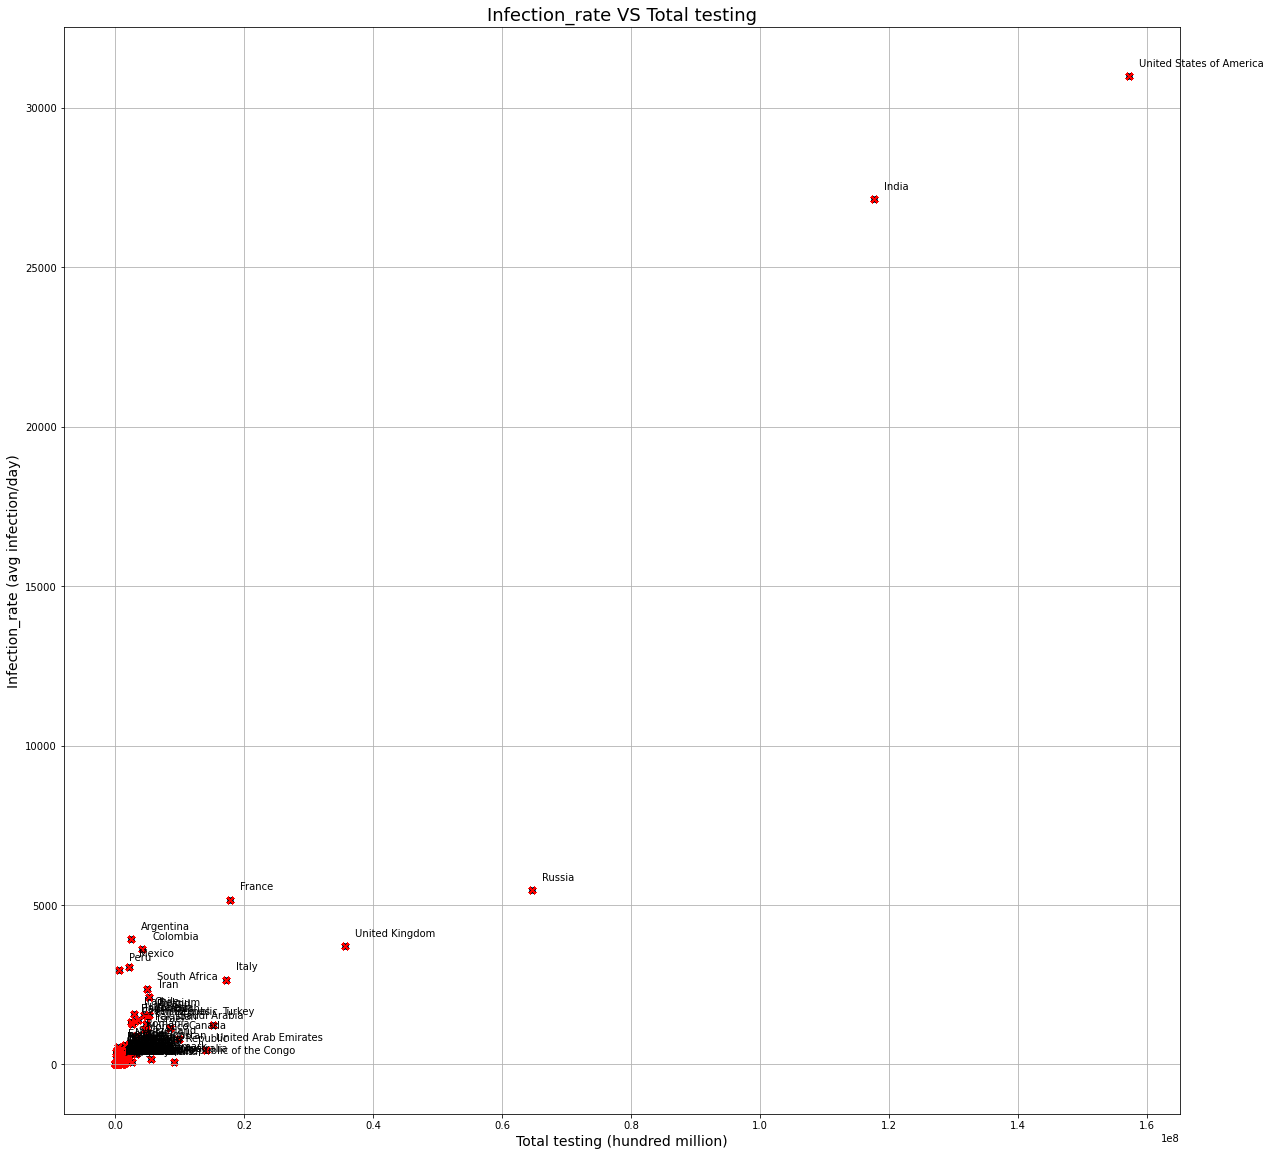

In [528]:
import matplotlib.pyplot as plt

# x = np.log(new_final['population'])
# y = np.log(new_final['infection rate'])
x = merged_inner_tested['Total_testings']
y= merged_inner_tested['infection_rate']
lab = merged_inner_tested['country']

fig, ax = plt.subplots(figsize=(20,20))
ax.scatter(x, y)

# ax = plt.subplot(212)
ax.set_xlabel('Total testing (hundred million)', fontsize=14)
ax.set_ylabel('Infection_rate (avg infection/day)', fontsize=14)
ax.set_title('Infection_rate VS Total testing', fontsize=18)


for i, txt in enumerate(lab):
    ax.annotate(txt, (x[i], y[i]), xytext=(10,10), textcoords='offset points')
    plt.scatter(x, y, marker='x', color='red')

plt.grid()
plt.show()

In [529]:
# client = bigquery.Client()
# sql1 = """SELECT * from covid19_open_data.Demographics order by key"""
# df_pop = client.query(sql1).to_dataframe()
# writer = ExcelWriter(data_path + "/" + "Demographics.xlsx")
# df_pop.to_excel(writer, sheet_name='Sheet1')
# writer.save()

In [530]:
df_pop.head()

,int64_field_0,key,population,population_male,population_female,rural_population,urban_population,largest_city_population,clustered_population,population_density,...,population_age_10_19,population_age_20_29,population_age_30_39,population_age_40_49,population_age_50_59,population_age_60_69,population_age_70_79,population_age_80_89,population_age_90_99,population_age_80_and_older
0,11802,None,2494530.0,1208865.0,1285665.0,1221272.0,1273258.0,417380.0,NaN,2.973746,...,489521.0,480544.0,357165.0,234870.0,146762.0,84248.0,39007.0,9049.0,2262.0,11312.0
1,0,AD,77142.0,58625.0,55581.0,9269.0,67873.0,NaN,NaN,163.842553,...,12022.0,10727.0,12394.0,21001.0,20720.0,14433.0,8657.0,3904.0,976.0,4881.0
2,1,AE,9770529.0,6766808.0,3003721.0,1290785.0,8479744.0,2833079.0,5914068.0,135.609110,...,786876.0,1841983.0,2722996.0,1907265.0,889205.0,225625.0,58028.0,9915.0,2478.0,12394.0
3,2,AF,38041754.0,19529725.0,18512029.0,28244481.0,9797273.0,4114030.0,4114030.0,56.937760,...,7706599.0,5461114.0,3607808.0,2379338.0,1464078.0,834370.0,376098.0,66176.0,16544.0,82721.0
4,3,AF_BAL,1325700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
